Task 1: Exploratory Data Analysis (EDA) and Business Insights 

In [1]:
#Loading the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Displaying the basic information about each dataset
print("Customers Dataset:")
print(customers.info(), "\n")

print("Products Dataset:")
print(products.info(), "\n")

print("Transactions Dataset:")
print(transactions.info(), "\n")


Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        

In [2]:
#Data Cleaning and Merging
print("Missing Values in Customers Dataset:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products Dataset:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions Dataset:")
print(transactions.isnull().sum(), "\n")

# Merge datasets into a single DataFrame for analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Verify the merged dataset
print("Merged Dataset Info:")
print(merged_data.info(), "\n")

# Preview the merged dataset
print("Sample of Merged Data:")
print(merged_data.head(), "\n")


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerN

In [3]:
#Summary Statistics
# Summary statistics for numerical columns
print("Summary Statistics:")
print(merged_data.describe(), "\n")

# Distribution of regions
print("Customer Distribution by Region:")
print(merged_data['Region'].value_counts(), "\n")


Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000 

Customer Distribution by Region:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64 



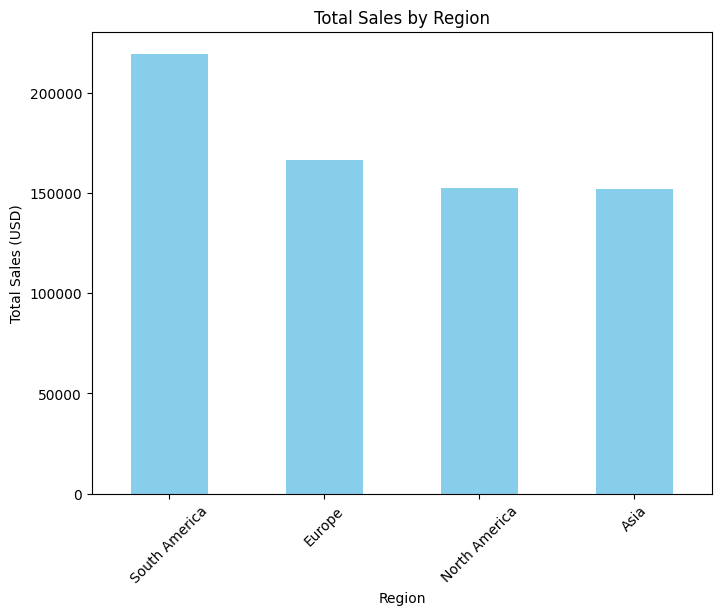

In [4]:
#Visualization 1: Total Sales by Region
# Total sales by region
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plotting total sales by region
plt.figure(figsize=(8, 6))
sales_by_region.plot(kind='bar', color='skyblue', title='Total Sales by Region')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


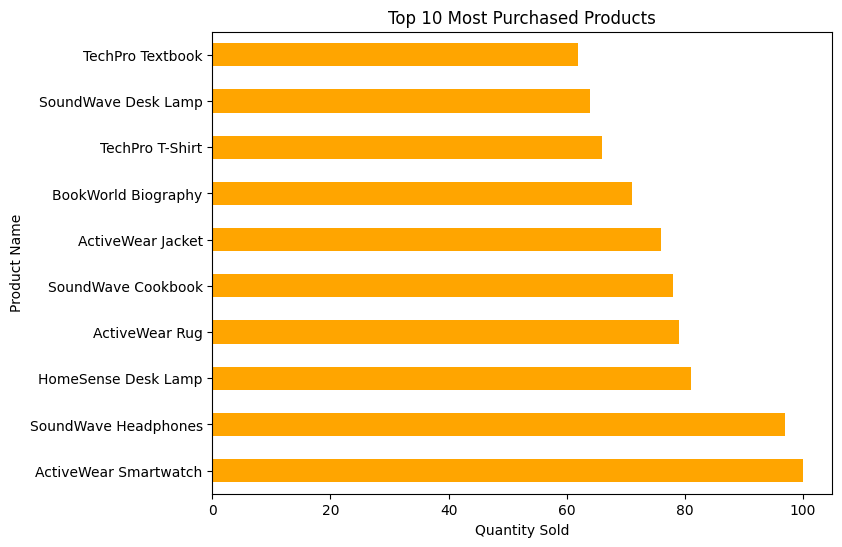

In [5]:
#Visualization 2: Most Purchased Products
# Most purchased products
most_purchased = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 most purchased products
plt.figure(figsize=(8, 6))
most_purchased.plot(kind='barh', color='orange', title='Top 10 Most Purchased Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


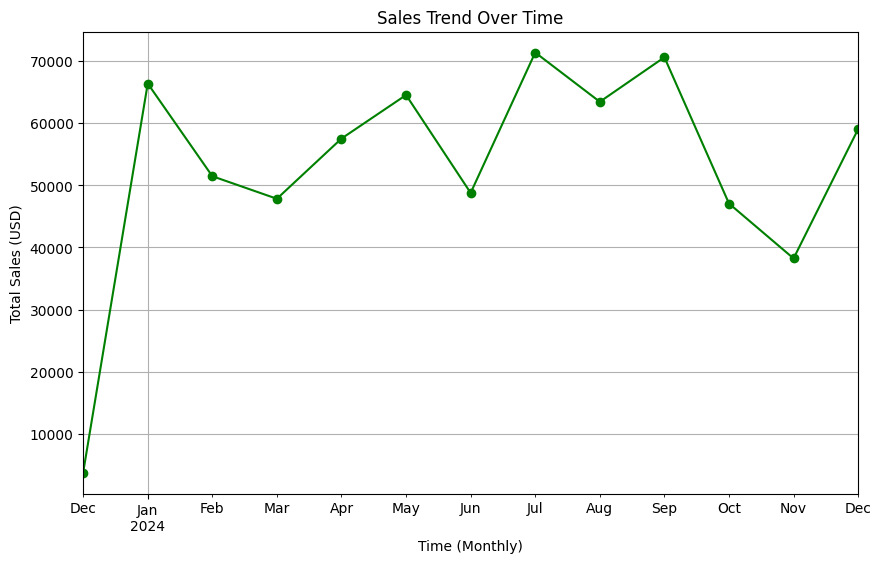

In [6]:
#Visualization 3: Sales Trends Over Time
# Converting TransactionDate to datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Grouping by month and year
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plotting sales trends over time
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', title='Sales Trend Over Time', color='green')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Time (Monthly)')
plt.grid()
plt.show()


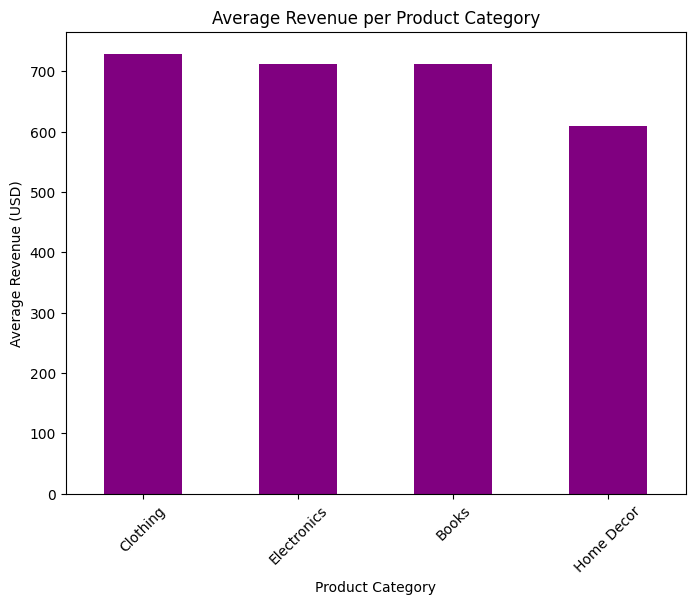

In [9]:
#Visualization: Average Revenue per Product Category
# Calculate average revenue per product category
avg_revenue_category = merged_data.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)

# Plotting average revenue per category
plt.figure(figsize=(8, 6))
avg_revenue_category.plot(kind='bar', color='purple', title='Average Revenue per Product Category')
plt.ylabel('Average Revenue (USD)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


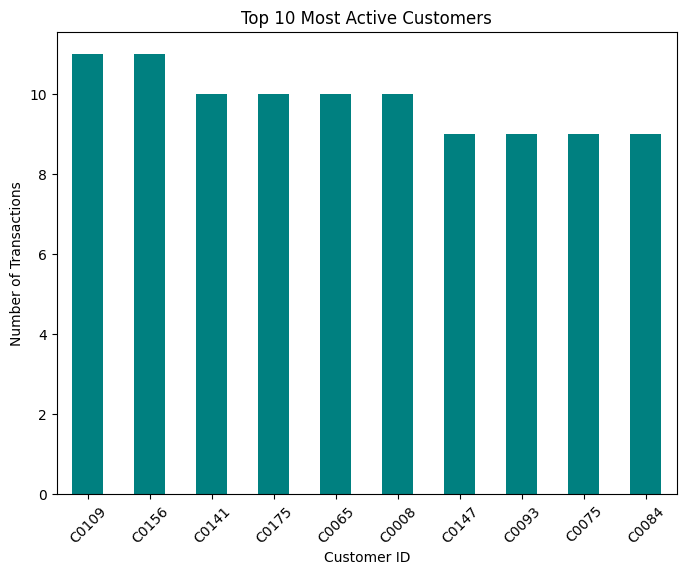

In [10]:
#Visualization: Customer Activity (Top 10 Most Active Customers)
# Top 10 most active customers based on transaction frequency
customer_activity = merged_data['CustomerID'].value_counts().head(10)

# Plotting customer activity
plt.figure(figsize=(8, 6))
customer_activity.plot(kind='bar', color='teal', title='Top 10 Most Active Customers')
plt.ylabel('Number of Transactions')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.show()


In [7]:
#Business Insights
# Business insights printed as summary
print("Key Insights:")
print("- Region with highest sales:", sales_by_region.idxmax(), "with total sales of", sales_by_region.max())
print("- Most purchased product:", most_purchased.idxmax(), "with quantity sold:", most_purchased.max())
print("- Month with highest sales:", sales_trend.idxmax(), "with total sales of", sales_trend.max())


Key Insights:
- Region with highest sales: South America with total sales of 219352.56
- Most purchased product: ActiveWear Smartwatch with quantity sold: 100
- Month with highest sales: 2024-07 with total sales of 71366.39


In [8]:
# Insight 1: Region with the highest and lowest sales
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_highest_sales = sales_by_region.idxmax()
region_lowest_sales = sales_by_region.idxmin()
region_highest_value = sales_by_region.max()
region_lowest_value = sales_by_region.min()

print(f"Insight 1: The region with the highest sales is '{region_highest_sales}' "
      f"with total sales of ${region_highest_value:.2f}. The lowest sales were from '{region_lowest_sales}' "
      f"with total sales of ${region_lowest_value:.2f}.")

# Insight 2: Most purchased product and its category
most_purchased_product = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).idxmax()
most_purchased_quantity = merged_data.groupby('ProductName')['Quantity'].sum().max()
most_purchased_category = merged_data[merged_data['ProductName'] == most_purchased_product]['Category'].iloc[0]

print(f"Insight 2: The most purchased product is '{most_purchased_product}' in the category '{most_purchased_category}' "
      f"with a total quantity sold of {most_purchased_quantity} units.")

# Insight 3: Best month for sales
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
best_month = sales_trend.idxmax()
best_month_sales = sales_trend.max()

print(f"Insight 3: The month with the highest sales is '{best_month}' with a total sales value of ${best_month_sales:.2f}.")

# Insight 4: Customers with high transaction frequency
customer_frequency = merged_data['CustomerID'].value_counts()
most_active_customer = customer_frequency.idxmax()
most_active_customer_count = customer_frequency.max()

print(f"Insight 4: The customer with the most transactions is '{most_active_customer}' with {most_active_customer_count} transactions.")

# Insight 5: Average revenue per product category
avg_revenue_category = merged_data.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
highest_avg_revenue_category = avg_revenue_category.idxmax()
highest_avg_revenue_value = avg_revenue_category.max()

print(f"Insight 5: The product category with the highest average revenue per transaction is '{highest_avg_revenue_category}' "
      f"with an average revenue of ${highest_avg_revenue_value:.2f} per transaction.")


Insight 1: The region with the highest sales is 'South America' with total sales of $219352.56. The lowest sales were from 'Asia' with total sales of $152074.97.
Insight 2: The most purchased product is 'ActiveWear Smartwatch' in the category 'Electronics' with a total quantity sold of 100 units.
Insight 3: The month with the highest sales is '2024-07' with a total sales value of $71366.39.
Insight 4: The customer with the most transactions is 'C0109' with 11 transactions.
Insight 5: The product category with the highest average revenue per transaction is 'Clothing' with an average revenue of $728.82 per transaction.


TASK 2 LOOKALIKE MODEL

In [19]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [20]:
customer_summary = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",   # Total spending by the customer
    "Quantity": "sum"      # Total items purchased
}).reset_index()

# Add average price column
customer_summary["Price"] = customer_summary["TotalValue"] / customer_summary["Quantity"]



In [21]:
print(customer_summary.head())


  CustomerID  TotalValue  Quantity       Price
0      C0001     3354.52        12  279.543333
1      C0002     1862.74        10  186.274000
2      C0003     2725.38        14  194.670000
3      C0004     5354.88        23  232.820870
4      C0005     2034.24         7  290.605714


In [23]:
# Aggregate transactional data for each customer
customer_summary = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",   # Total spending by the customer
    "Quantity": "sum"      # Total items purchased
}).reset_index()

# Calculate average price per transaction
customer_summary["Price"] = customer_summary["TotalValue"] / customer_summary["Quantity"]

# Add customer profile features (Region and SignupDate)
customer_profiles = customers.merge(customer_summary, on="CustomerID")
customer_profiles = pd.get_dummies(customer_profiles, columns=["Region"], drop_first=True)

# Standardize numeric columns
scaler = StandardScaler()
customer_profiles_scaled = customer_profiles.copy()
numeric_cols = ["TotalValue", "Quantity", "Price"]
customer_profiles_scaled[numeric_cols] = scaler.fit_transform(customer_profiles[numeric_cols])


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(customer_profiles_scaled[numeric_cols])

# Create a DataFrame for the similarity matrix for easier interpretation
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=customer_profiles["CustomerID"],
    columns=customer_profiles["CustomerID"]
)


In [26]:
# Function to get top 3 similar customers for a given customer
def get_top_3_similar(customer_id):
    # Sort similarity scores in descending order and ignore the customer itself (self-similarity)
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:4]
    return [(cust_id, round(score, 3)) for cust_id, score in similar_customers.items()]


In [28]:
# Save the lookalike data to a CSV file
lookalike_output.to_csv("Firstname_Lastname_Lookalike.csv", index=False)

# Display the Lookalike Recommendations
print(lookalike_output.head())


  CustomerID                                         Lookalikes
0      C0001  [('C0092', 1.0), ('C0007', 0.997), ('C0146', 0...
1      C0002   [('C0157', 1.0), ('C0029', 1.0), ('C0076', 1.0)]
2      C0003  [('C0160', 0.998), ('C0111', 0.998), ('C0147',...
3      C0004  [('C0162', 0.999), ('C0090', 0.999), ('C0165',...
4      C0005  [('C0167', 1.0), ('C0020', 1.0), ('C0198', 0.9...


TASK 3

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge transactions with customers
merged_data = transactions.merge(customers, on="CustomerID")

# Aggregate transactional data for each customer
customer_summary = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending
    "Quantity": "sum",    # Total items purchased
}).reset_index()

# Add customer profile features (Region, SignupDate)
customer_profiles = customers.merge(customer_summary, on="CustomerID")
customer_profiles = pd.get_dummies(customer_profiles, columns=["Region"], drop_first=True)

# Standardize numeric columns for clustering
scaler = StandardScaler()
numeric_cols = ["TotalValue", "Quantity"]
customer_profiles[numeric_cols] = scaler.fit_transform(customer_profiles[numeric_cols])


In [31]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge transactions with customers
merged_data = transactions.merge(customers, on="CustomerID")

# Aggregate transactional data for each customer
customer_summary = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending
    "Quantity": "sum",    # Total items purchased
}).reset_index()

# Add customer profile features (Region, SignupDate)
customer_profiles = customers.merge(customer_summary, on="CustomerID")
customer_profiles = pd.get_dummies(customer_profiles, columns=["Region"], drop_first=True)

# Standardize numeric columns for clustering
scaler = StandardScaler()
numeric_cols = ["TotalValue", "Quantity"]
customer_profiles[numeric_cols] = scaler.fit_transform(customer_profiles[numeric_cols])


In [33]:
# Define the range of clusters to test
cluster_range = range(2, 11)

# Store evaluation metrics
db_scores = []
silhouette_scores = []
models = []

# Test different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(customer_profiles[numeric_cols])
    
    # Calculate Davies-Bouldin Index and Silhouette Score
    db_index = davies_bouldin_score(customer_profiles[numeric_cols], cluster_labels)
    silhouette_avg = silhouette_score(customer_profiles[numeric_cols], cluster_labels)
    
    # Store metrics and models
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)
    models.append((n_clusters, kmeans, cluster_labels))


In [34]:
# Find the best number of clusters based on the lowest Davies-Bouldin Index
best_model = models[np.argmin(db_scores)]
best_n_clusters, best_kmeans, best_labels = best_model

print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best DB Index: {min(db_scores):.3f}")
print(f"Silhouette Score for Best Model: {silhouette_scores[np.argmin(db_scores)]:.3f}")


Best Number of Clusters: 2
Best DB Index: 0.627
Silhouette Score for Best Model: 0.550
